In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

/Users/hernandezurbina/Dev/venv/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/hernandezurbina/Dev/venv/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/hernandezurbina/Dev/venv/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/hernandezurbina/Dev/venv/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [127]:
wine = pd.read_csv('datasets/winequality/winequality-red.csv')

In [128]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### Quality is the target var

In [6]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


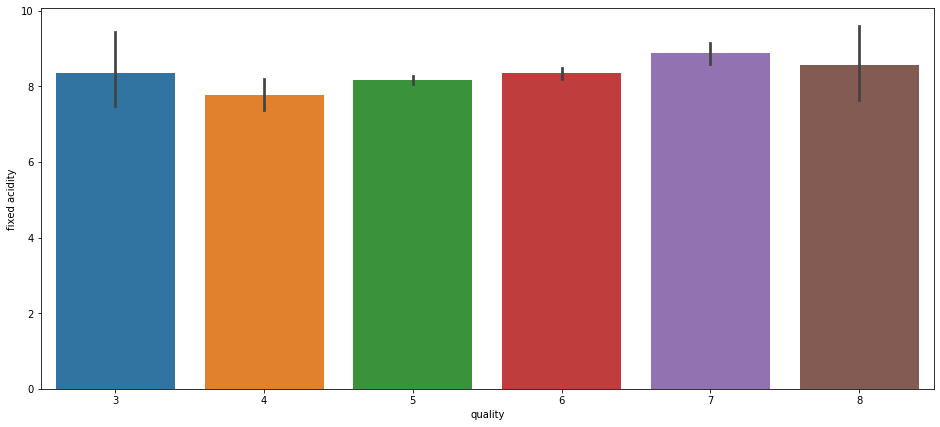

In [9]:
plt.figure(figsize=(16, 7))
sns.barplot(x='quality', y='fixed acidity', data=wine)
plt.show()

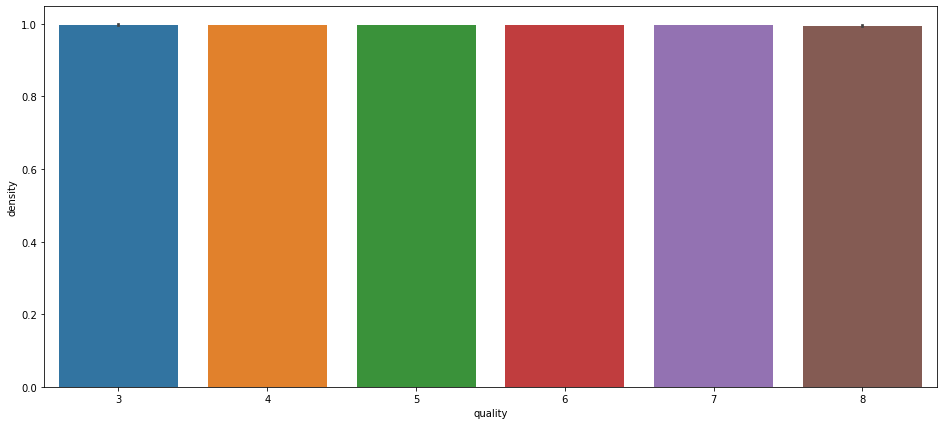

In [129]:
plt.figure(figsize=(16, 7))
sns.barplot(x='quality', y='density', data=wine)
plt.show()

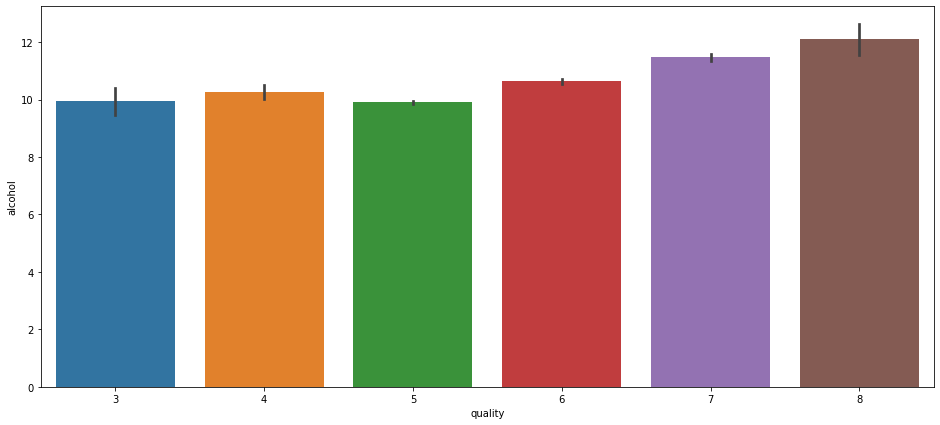

In [10]:
plt.figure(figsize=(16, 7))
sns.barplot(x='quality', y='alcohol', data=wine)
plt.show()

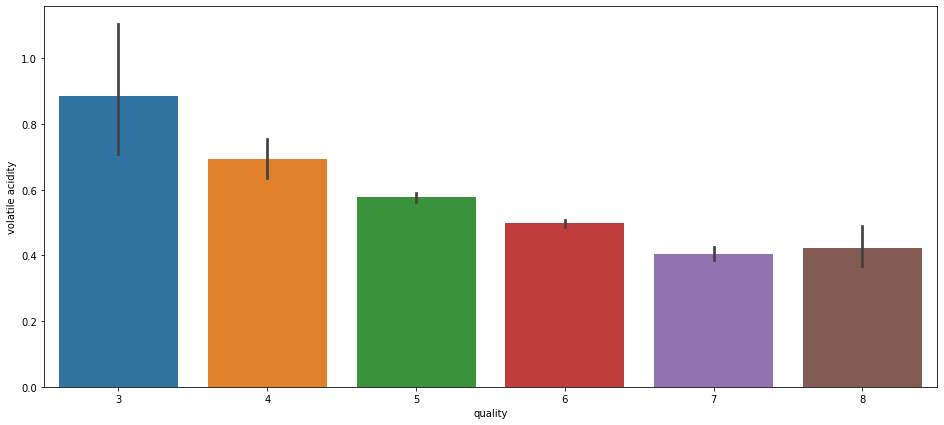

In [11]:
plt.figure(figsize=(16, 7))
sns.barplot(x='quality', y='volatile acidity', data=wine)
plt.show()

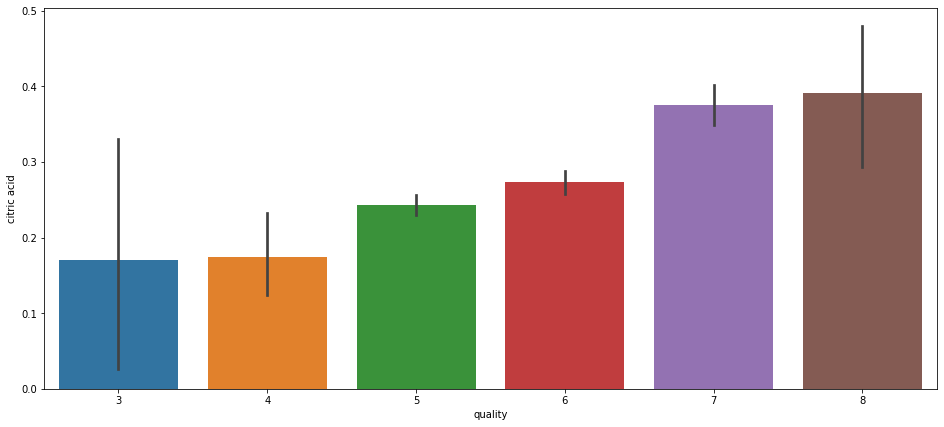

In [12]:
plt.figure(figsize=(16, 7))
sns.barplot(x='quality', y='citric acid', data=wine)
plt.show()

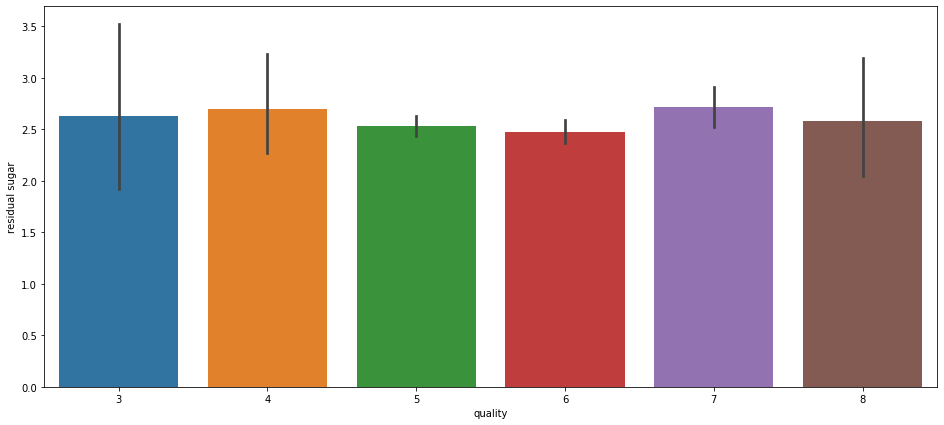

In [13]:
plt.figure(figsize=(16, 7))
sns.barplot(x='quality', y='residual sugar', data=wine)
plt.show()

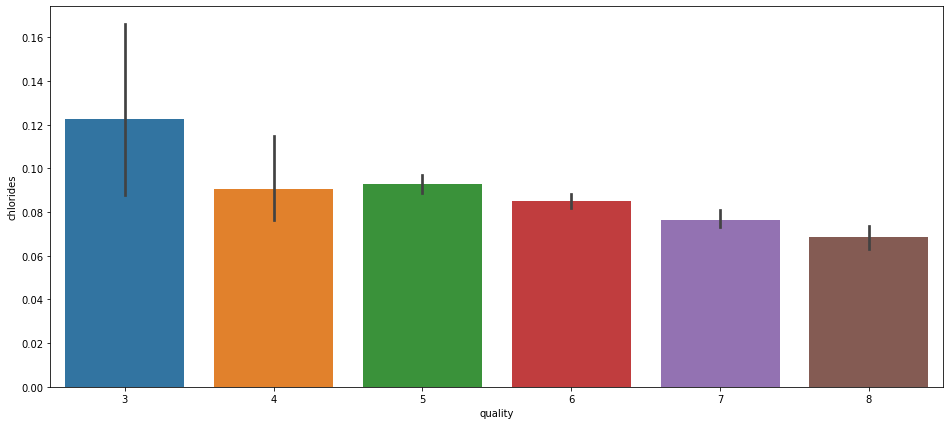

In [14]:
plt.figure(figsize=(16, 7))
sns.barplot(x='quality', y='chlorides', data=wine)
plt.show()

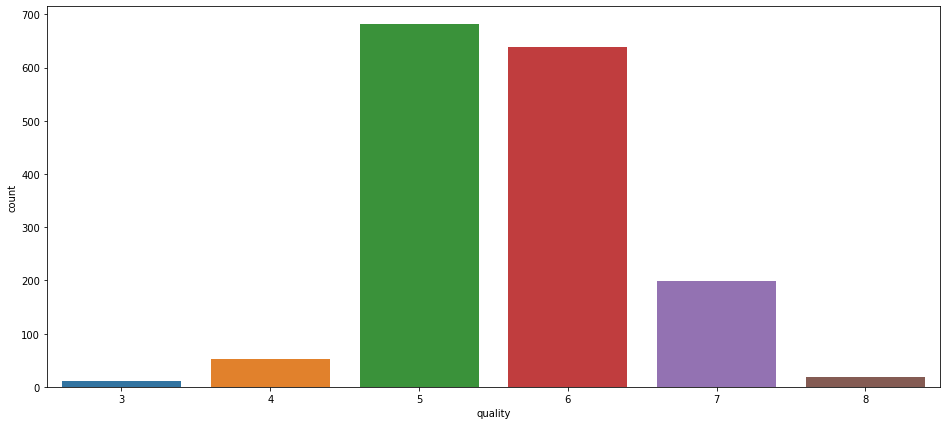

In [15]:
plt.figure(figsize=(16, 7))
sns.countplot(x='quality', data=wine)
plt.show()

### Some "classes" are misrepresented!

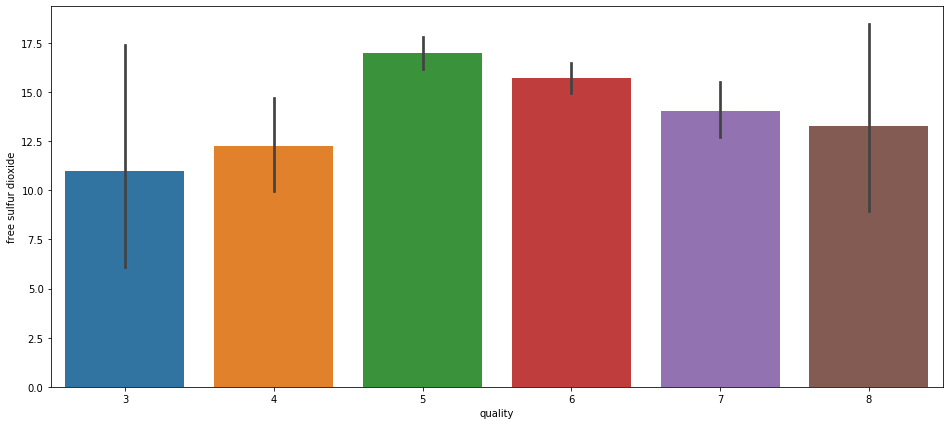

In [16]:
plt.figure(figsize=(16, 7))
sns.barplot(x='quality', y='free sulfur dioxide', data=wine)
plt.show()

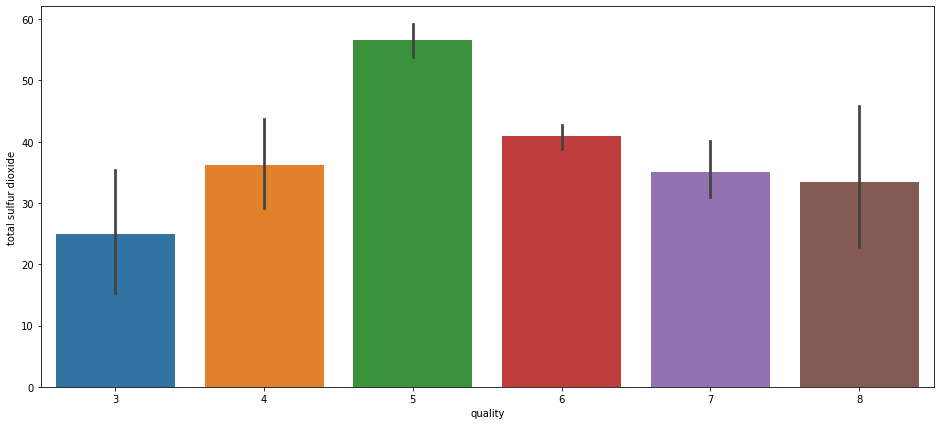

In [17]:
plt.figure(figsize=(16, 7))
sns.barplot(x='quality', y='total sulfur dioxide', data=wine)
plt.show()

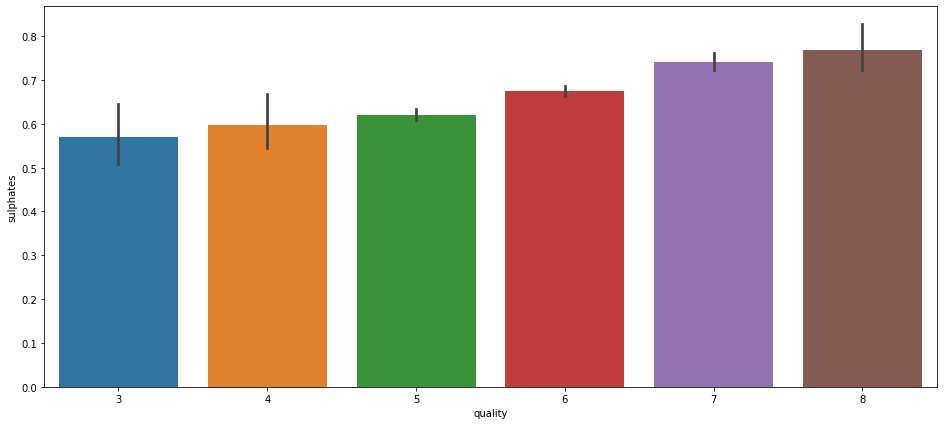

In [19]:
plt.figure(figsize=(16, 7))
sns.barplot(x='quality', y='sulphates', data=wine)
plt.show()

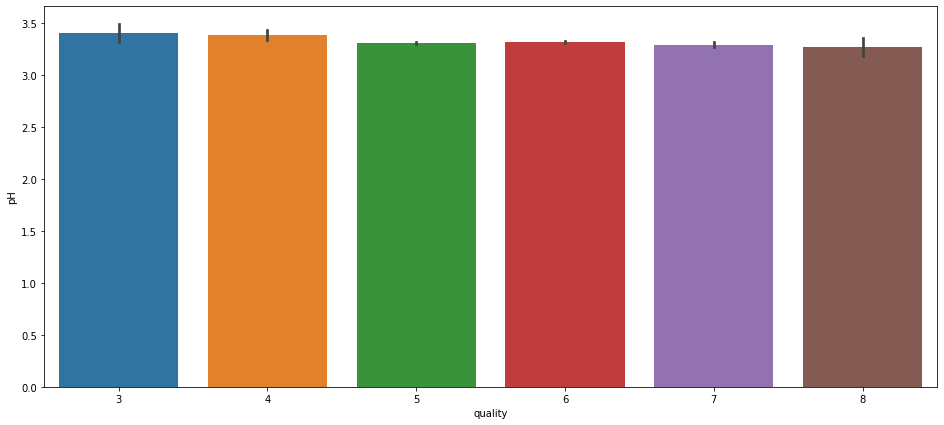

In [101]:
plt.figure(figsize=(16, 7))
sns.barplot(x='quality', y='pH', data=wine)
plt.show()

### Preprocessing data

In [104]:
# let's binarize the target var
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins=bins, labels=group_names)

In [105]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [22]:
label_quality = LabelEncoder()

In [106]:
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [107]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [108]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

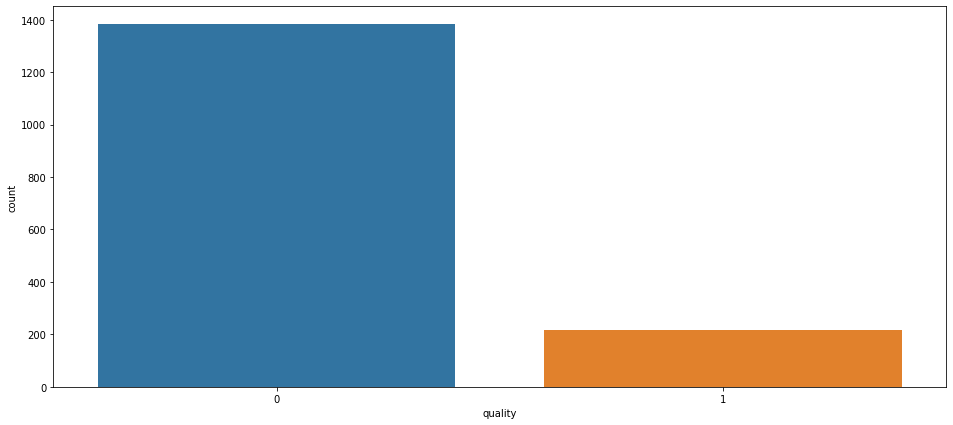

In [109]:
plt.figure(figsize=(16, 7))
sns.countplot(wine['quality'])
plt.show()

### Target var is pretty unbalanced!

In [27]:
X = wine.drop('quality', axis=1)
y = wine['quality']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# let's use a standard scaler!
sc = StandardScaler()

In [30]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test) ### should we fit and transform each set separately?

### Let's train some models!

#### Random Forest

In [32]:
modelRF = RandomForestClassifier(n_estimators=200)
modelRF.fit(X_train, y_train)
preds = modelRF.predict(X_test)

In [33]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       273
           1       0.61      0.36      0.45        47

    accuracy                           0.87       320
   macro avg       0.75      0.66      0.69       320
weighted avg       0.85      0.87      0.86       320



In [34]:
print(confusion_matrix(y_test, preds))

[[262  11]
 [ 30  17]]


#### SGD Classifier

In [37]:
modelSGD = SGDClassifier(penalty=None)
modelSGD.fit(X_train, y_train)
preds = modelSGD.predict(X_test)

In [38]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       273
           1       0.38      0.32      0.34        47

    accuracy                           0.82       320
   macro avg       0.63      0.61      0.62       320
weighted avg       0.81      0.82      0.82       320



In [39]:
print(confusion_matrix(y_test, preds))

[[248  25]
 [ 32  15]]


#### SVM Classifier

In [40]:
modelSVC = SVC()
modelSVC.fit(X_train, y_train)
preds = modelSVC.predict(X_test)
## at this point it seems that all that ML is 
## is just running these lines with different models from SKLearn
## don't do this! know the science behind each model
## most of ML is done in the preprocessing stage
## just like in filmmaking ;-)

In [41]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



In [42]:
print(confusion_matrix(y_test, preds))

[[268   5]
 [ 35  12]]


### Let's try to improve by doing some grid search

In [43]:
### for SVM
param = {
    'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4]
}

In [44]:
gridSVM = GridSearchCV(modelSVC, param_grid=param, scoring='accuracy', cv=10)

In [45]:
gridSVM.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [46]:
gridSVM.best_params_

{'C': 1.2, 'gamma': 0.9, 'kernel': 'rbf'}

In [47]:
modelSVM2 = SVC(C=1.2, gamma=0.9, kernel='rbf')
modelSVM2.fit(X_train, y_train)
preds = modelSVM2.predict(X_test)

In [48]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       273
           1       0.89      0.34      0.49        47

    accuracy                           0.90       320
   macro avg       0.89      0.67      0.72       320
weighted avg       0.90      0.90      0.88       320



### Let's do some CV for RF

In [49]:
rfEval = cross_val_score(estimator=modelRF, X=X_train, y=y_train, cv=10)
rfEval.mean()

0.9116695374015749

## Let's try doing some other transformations on dataset

In [52]:
X = wine[['alcohol', 'volatile acidity', 'citric acid', 'chlorides', 'sulphates']]
y = wine['quality']

In [53]:
X.head()

,alcohol,volatile acidity,citric acid,chlorides,sulphates
0,9.4,0.70,0.00,0.076,0.56
1,9.8,0.88,0.00,0.098,0.68
2,9.8,0.76,0.04,0.092,0.65
3,9.8,0.28,0.56,0.075,0.58
4,9.4,0.70,0.00,0.076,0.56


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test) ## let's try next time just fitting the scaler to the test set

In [56]:
modelRF = RandomForestClassifier(n_estimators=200)
modelRF.fit(X_train, y_train)
preds = modelRF.predict(X_test)
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       273
           1       0.57      0.34      0.43        47

    accuracy                           0.87       320
   macro avg       0.73      0.65      0.68       320
weighted avg       0.85      0.87      0.85       320

[[261  12]
 [ 31  16]]


In [57]:
modelSGD = SGDClassifier(penalty=None)
modelSGD.fit(X_train, y_train)
preds = modelSGD.predict(X_test)
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       273
           1       0.44      0.36      0.40        47

    accuracy                           0.84       320
   macro avg       0.66      0.64      0.65       320
weighted avg       0.83      0.84      0.83       320

[[251  22]
 [ 30  17]]


In [58]:
modelSVC = SVC()
modelSVC.fit(X_train, y_train)
preds = modelSVC.predict(X_test)
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       273
           1       0.56      0.21      0.31        47

    accuracy                           0.86       320
   macro avg       0.72      0.59      0.61       320
weighted avg       0.83      0.86      0.83       320

[[265   8]
 [ 37  10]]


#### Grid search again!

In [59]:
gridSVM.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [60]:
gridSVM.best_params_

{'C': 1.1, 'gamma': 1, 'kernel': 'rbf'}

In [61]:
modelSVM2 = SVC(C=1.1, gamma=1, kernel='rbf')
modelSVM2.fit(X_train, y_train)
preds = modelSVM2.predict(X_test)
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       273
           1       0.64      0.30      0.41        47

    accuracy                           0.87       320
   macro avg       0.76      0.63      0.67       320
weighted avg       0.85      0.87      0.85       320

[[265   8]
 [ 33  14]]


In [62]:
rfEval = cross_val_score(estimator=modelRF, X=X_train, y=y_train, cv=10)
rfEval.mean()
### worse than initial :(

0.905425688976378

### Let's try whole set again with different scaler step

In [113]:
X = wine.drop('quality', axis=1)
y = wine['quality']

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) # this time we didnt fit and transformed test set, only transformed 

In [115]:
modelRF = RandomForestClassifier(n_estimators=200)
modelRF.fit(X_train, y_train)
preds = modelRF.predict(X_test)
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       273
           1       0.71      0.51      0.59        47

    accuracy                           0.90       320
   macro avg       0.81      0.74      0.77       320
weighted avg       0.89      0.90      0.89       320

[[263  10]
 [ 23  24]]


In [116]:
modelSGD = SGDClassifier(penalty=None)
modelSGD.fit(X_train, y_train)
preds = modelSGD.predict(X_test)
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89       273
           1       0.42      0.64      0.51        47

    accuracy                           0.82       320
   macro avg       0.68      0.74      0.70       320
weighted avg       0.86      0.82      0.83       320

[[232  41]
 [ 17  30]]


In [117]:
modelSVC = SVC()
modelSVC.fit(X_train, y_train)
preds = modelSVC.predict(X_test)
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320

[[268   5]
 [ 35  12]]


In [118]:
gridSVM.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [119]:
gridSVM.best_params_

{'C': 1.2, 'gamma': 0.9, 'kernel': 'rbf'}

In [120]:
modelSVM2 = SVC(C=1.2, gamma=0.9, kernel='rbf')
modelSVM2.fit(X_train, y_train)
preds = modelSVM2.predict(X_test)
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       273
           1       0.85      0.36      0.51        47

    accuracy                           0.90       320
   macro avg       0.88      0.68      0.72       320
weighted avg       0.89      0.90      0.88       320

[[270   3]
 [ 30  17]]


In [121]:
rfEval = cross_val_score(estimator=modelRF, X=X_train, y=y_train, cv=10)
rfEval.mean()

0.9140194389763779

## So, transformation on dataset improved RF and SGD classifiers only! What about thresholding in a diff value?

In [85]:
wine = pd.read_csv('datasets/winequality/winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [74]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [86]:
# we gotta reload raw dataset again
# let's binarize the target var

# target var: median is at 6
bins = (2, 5.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins=bins, labels=group_names)

In [87]:
wine['quality'] = label_quality.fit_transform(wine['quality'])
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


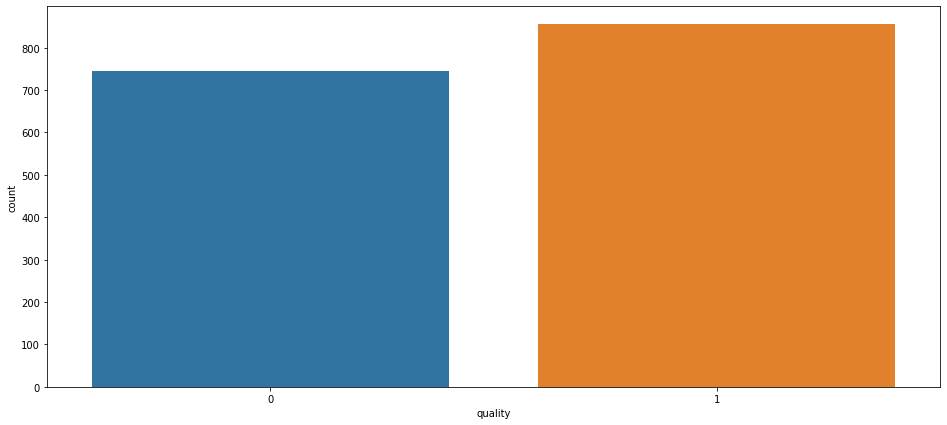

In [88]:
plt.figure(figsize=(16, 7))
sns.countplot(wine['quality'])
plt.show()

In [89]:
wine['quality'].value_counts()

1    855
0    744
Name: quality, dtype: int64

In [90]:
X = wine.drop('quality', axis=1)
y = wine['quality']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) # this time we didnt fit and transformed test set, only transformed 

In [92]:
modelRF = RandomForestClassifier(n_estimators=200)
modelRF.fit(X_train, y_train)
preds = modelRF.predict(X_test)
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))
"""
this time it performed worse!
does it mean that the previous binarization was better?
this means that when model believes obs should get a 0
the data says it should be 1 (because in current binarization
the nums of 1s increased!) So model is learning well what
a bad wine is!
"""

              precision    recall  f1-score   support

           0       0.76      0.77      0.76       141
           1       0.81      0.80      0.81       179

    accuracy                           0.79       320
   macro avg       0.78      0.79      0.78       320
weighted avg       0.79      0.79      0.79       320

[[108  33]
 [ 35 144]]


In [93]:
modelSGD = SGDClassifier(penalty=None)
modelSGD.fit(X_train, y_train)
preds = modelSGD.predict(X_test)
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))
'''
same as above!
'''

              precision    recall  f1-score   support

           0       0.66      0.74      0.70       141
           1       0.78      0.69      0.73       179

    accuracy                           0.72       320
   macro avg       0.72      0.72      0.71       320
weighted avg       0.72      0.72      0.72       320

[[105  36]
 [ 55 124]]


In [94]:
modelSVC = SVC()
modelSVC.fit(X_train, y_train)
preds = modelSVC.predict(X_test)
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75       141
           1       0.81      0.77      0.79       179

    accuracy                           0.77       320
   macro avg       0.77      0.77      0.77       320
weighted avg       0.77      0.77      0.77       320

[[109  32]
 [ 41 138]]


In [95]:
gridSVM.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [96]:
gridSVM.best_params_

{'C': 1.4, 'gamma': 0.9, 'kernel': 'rbf'}

In [97]:
modelSVM2 = SVC(C=1.4, gamma=0.9, kernel='rbf')
modelSVM2.fit(X_train, y_train)
preds = modelSVM2.predict(X_test)
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.79      0.70      0.74       141
           1       0.78      0.85      0.82       179

    accuracy                           0.79       320
   macro avg       0.79      0.78      0.78       320
weighted avg       0.79      0.79      0.79       320

[[ 99  42]
 [ 26 153]]


## The last partition was bad for classification. Let's go back to initial partition and now study feature importance

In [112]:
import eli5

/Users/hernandezurbina/Dev/venv/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/hernandezurbina/Dev/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/hernandezurbina/Dev/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be import

In [122]:
eli5.show_weights(modelRF)

Weight,Feature
0.1719 ± 0.1248,x10
0.1180 ± 0.0763,x9
0.1118 ± 0.0908,x1
0.0911 ± 0.0800,x7
0.0873 ± 0.0748,x2
0.0814 ± 0.0615,x6
0.0742 ± 0.0552,x4
0.0719 ± 0.0532,x0
0.0710 ± 0.0579,x3
0.0614 ± 0.0531,x5


In [125]:
X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [130]:
eli5.show_weights(modelSGD)

Weight?,Feature
+1.975,x10
+1.615,x0
+0.536,x9
+0.385,x8
+0.308,x3
+0.294,x2
-0.004,x7
-0.331,x5
-0.752,x1
-1.188,x6


In [132]:
eli5.show_weights(modelSVC)

### Let's try a log reg model in order to test ideas of feature importance

In [133]:
from sklearn.linear_model import LogisticRegression

In [136]:
modelLR = LogisticRegression(random_state=0, penalty='l2')
modelLR.fit(X_train, y_train)
preds = modelLR.predict(X_test)
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.89      0.97      0.92       273
           1       0.59      0.28      0.38        47

    accuracy                           0.87       320
   macro avg       0.74      0.62      0.65       320
weighted avg       0.84      0.87      0.84       320

[[264   9]
 [ 34  13]]


In [142]:
modelLR.coef_

array([[ 0.44249344, -0.48821881,  0.07044909,  0.31068905, -0.32811387,
         0.12219948, -0.59659581, -0.4419943 ,  0.03623457,  0.58013967,
         0.80893147]])

In [152]:
feature_importance = pd.DataFrame({'Feature': X.columns.tolist(), 'Coefficients': modelLR.coef_[0]})        

In [147]:
feature_importance

,Feature,Coefficients
0,fixed acidity,0.442493
1,volatile acidity,-0.488219
2,citric acid,0.070449
3,residual sugar,0.310689
4,chlorides,-0.328114
5,free sulfur dioxide,0.122199
6,total sulfur dioxide,-0.596596
7,density,-0.441994
8,pH,0.036235
9,sulphates,0.580140


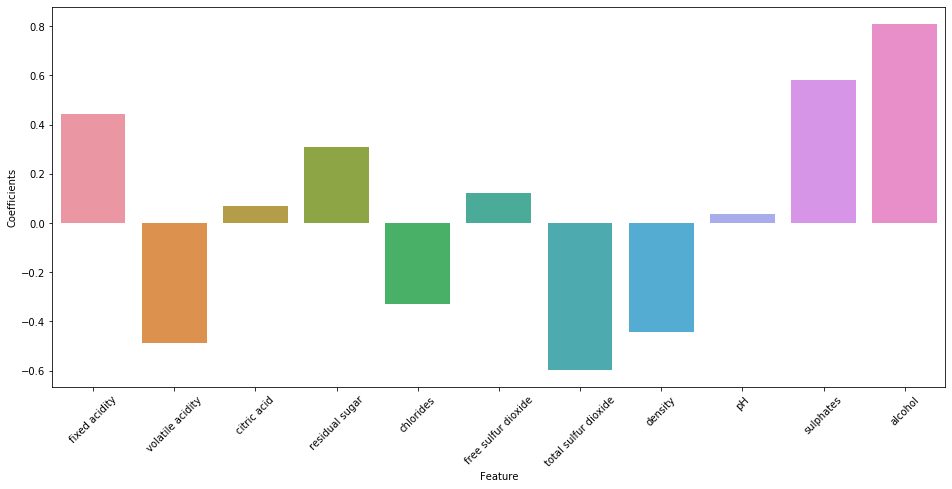

In [149]:
plt.figure(figsize=(16, 7))
sns.barplot(x='Feature', y='Coefficients', data=feature_importance)
plt.xticks(rotation=45)
plt.show()
'''
looking at the plot below, does it mean that we can discard
all features that are close to zero?
'''

#### Let's inspect the RF

In [150]:
modelRF.feature_importances_

array([0.07194005, 0.11182033, 0.08734568, 0.07101766, 0.07418231,
       0.06143905, 0.08136113, 0.09106725, 0.05993391, 0.11795281,
       0.17193983])

In [156]:
feature_importance = pd.DataFrame({'Feature': X.columns.tolist(), 'Score': modelRF.feature_importances_})  

In [157]:
feature_importance

,Feature,Score
0,fixed acidity,0.071940
1,volatile acidity,0.111820
2,citric acid,0.087346
3,residual sugar,0.071018
4,chlorides,0.074182
5,free sulfur dioxide,0.061439
6,total sulfur dioxide,0.081361
7,density,0.091067
8,pH,0.059934
9,sulphates,0.117953


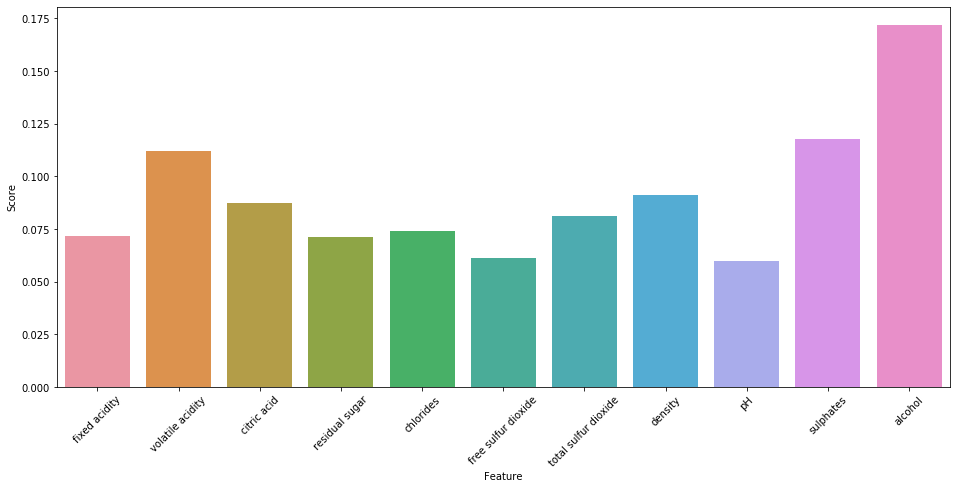

In [159]:
plt.figure(figsize=(16, 7))
sns.barplot(x='Feature', y='Score', data=feature_importance)
plt.xticks(rotation=45)
plt.show()

## Let's have a look at permutation importance